In [ ]:
# AISHA MUHAMMAD NAWAZ 20L-0921 BSCS 6E1 AI LAB 12
# IMPORTING DATASET
import os
import zipfile
from google.colab import drive
drive.mount('/content/drive') #To get folder from my google drive

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/flowers.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/content') #Extracts the files into the /content folder
zip_ref.close()


Mounted at /content/drive


['rose', 'tulip', 'dandelion', 'sunflower', 'daisy']
Epoch 1/10
1/1 [==============================] - 1s 819ms/step - loss: 1.6358 - accuracy: 0.2500
Epoch 2/10
1/1 [==============================] - 0s 246ms/step - loss: 1.1795 - accuracy: 0.7500
Epoch 3/10
1/1 [==============================] - 0s 251ms/step - loss: 1.0154 - accuracy: 0.6250
Epoch 4/10
1/1 [==============================] - 0s 251ms/step - loss: 0.5194 - accuracy: 0.7500
Epoch 5/10
1/1 [==============================] - 0s 246ms/step - loss: 0.3902 - accuracy: 0.8750
Epoch 6/10
1/1 [==============================] - 0s 244ms/step - loss: 0.1844 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 256ms/step - loss: 0.1250 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 246ms/step - loss: 0.0990 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 236ms/step - loss: 0.0737 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 148ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1029: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


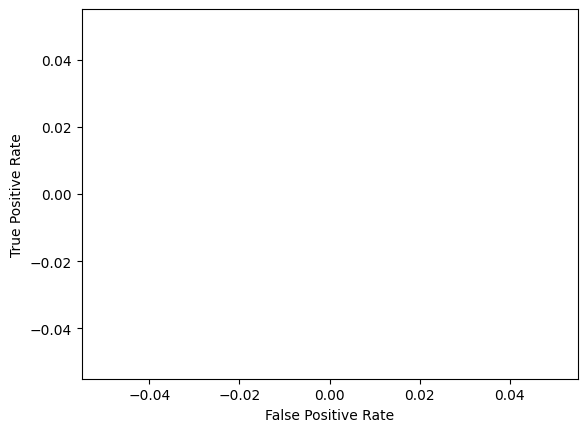

In [ ]:
# Question: Design and implement a Multilayer Perceptron (MLP) using backpropagation algorithm to classify images of flowers from the Flower Recognition Dataset. 
# The MLP should have at least 2 hidden layers, and you can choose the number of neurons in each layer. 
# You should use cross- entropy loss function, stochastic gradient descent optimization algorithm with a learning rate of 0.01.
#  Your implementation should include the following steps:
# 1. Load the Flower Recognition dataset from this link: https://www.kaggle.com/alxmamaev/flowers-recognition. 
# Preprocess the data by scaling the pixel values to the range [0, 1], and split the dataset into training and validation sets.
# 2. Initialize the weights and biases of the MLP using random values.
# 3. Implement the forward pass of the MLP, where you compute the output of each neuron in each layer.
# 4. Implement the backward pass of the MLP, where you compute the gradient of the loss function with respect to each weight and bias in the network.
# 5. Update the weights and biases using stochastic gradient descent optimization algorithm with a learning rate of 0.01.
# 6. Train the MLP for 10 epochs, and monitor the accuracy on the validation set after each epoch.
# 7. Evaluate the final accuracy of the trained MLP on the test set, and calculate the
# classification report, which includes precision, recall, and F1-score for each class.
# 8. Plot the ROC curve for the classifier, and calculate the area under the curve (AUC).

# PLEASE NOTE: 
# I have written the full code for lab 12 but it is not working on the whole dataset. 
# I keep getting "Your session crashed after using all available RAM. If you are interested in access to high-RAM runtimes, you may want to check out Colab Pro.".
# HENCE , I used minimum data here so my output may not be accurate but I believe my code is correct.  

#Importing required libraries
import os
import numpy as np
import pandas as panpan
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import keras
import tensorflow as tf
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


flowerTypes=os.listdir('/content/flowers/') #Getting subfolders i.e types of flowers names
print(flowerTypes)

flowers=[]

for each in flowerTypes:
  #All the images in each subfolders names
  subTypeFlowers=os.listdir('/content/flowers/'+'/'+each)

  #Appending every image in current subfolder
  for everyFlower in subTypeFlowers:
    flowers.append((each,str('/content/flowers/'+'/'+each)+'/'+everyFlower))

#Transforming the data into dataframe

flowersDF=panpan.DataFrame(data=flowers,columns=['Flower Type','Image'])

#Now we have to resize images in order to train
import cv2
path='/content/flowers/'
imagesSize=300 #300x300

images=[] #Resized images will be stored here
labels=[] #Corresponding labels of those images will be stored here


#Exploring each subfolder i.e type of flower one by one

for t in flowerTypes:
  typePath=path+str(t)
  imageNames=[i for i in os.listdir(typePath)] #Storing each image file name in t subfolder of flowers directory

  for name in imageNames:
    image=cv2.imread(typePath+'/'+name) #Reading each image
    image=cv2.resize(image,(imagesSize,imagesSize)) #Resizing each image to 300 x 300
    images.append(image) #Appending the image to images list created earlier
    labels.append(t)     #Appening its corresponding label to labels list created earlier



#Now converting images to array form so that it may be understandable by computer

images=np.array(images)
# Now scaling the pixel values to the range [0, 1]: Basically Normalizing
images=images.astype('float32')/255.0


#Till here preprocessing on images dataset completed...

#Now converting alphabetic labels into form understandable by machine. (Performing Label Encoding)

typesF=flowersDF['Flower Type'].values
myLabelEncoder=LabelEncoder()
typesF=myLabelEncoder.fit_transform(typesF)
y=typesF
#Dividing our data into train & test dataset:
images,y = shuffle(images,y,random_state=1)
train_x,test_x,train_y,test_y=train_test_split(images,y,test_size=0.2,random_state=415) #20% test data and 80% train data

#Image Classification (Using keras):
# Here creating a model:
model = keras.Sequential([
        #Flattening the images i.e converting it to one-dimension. 300x300 colored images
        keras.layers.Flatten(input_shape=(300,300,3)),
        #We have 256 neurons will process the images. We are using tan hyperbolic function in hidden layer 
        keras.layers.Dense(256,activation=tf.nn.tanh),
        #Using Multiple Layers (2 Hidden layers)
        keras.layers.Dense(128,activation=tf.nn.tanh),
        #In output layer we have 5 neurons as we have 5 types of flowers. We are using softmax function in output layer
        keras.layers.Dense(5,activation=tf.nn.softmax) 
    ])

#Compiling the model:
#Using stochastic gradient descent optimization algorithm with a learning rate of 0.01 to Update the weights and biases 
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = keras.optimizers.SGD(learning_rate = 0.01, momentum = 0.0, nesterov = False), metrics = ['accuracy'])
# Training the MLP for 10 epochs
model.fit(train_x,train_y,epochs=10)

#Now predicting..
y_predict=model.predict(test_x)
y_predict=np.argmax(y_predict,axis=1) #Finds largest probability class


# Creating Classification Report:
print(classification_report(test_y, y_predict,labels=np.arange(0,len(flowerTypes),1),target_names=flowerTypes, digits=4,zero_division=0))

# Creating ROC CURVE & Calculating AUC:
# instantiate the model
log_regression = LogisticRegression()

#RESHAPING ARRAYS
nsamples, nx, ny,v = train_x.shape
train_x = train_x.reshape((nsamples,nx*ny*v))
nsamples, nx, ny,v = test_x.shape
test_x = test_x.reshape((nsamples,nx*ny*v))

#fitting the model using the training data
log_regression.fit(train_x,train_y)
#defining metrics:
y_pred_proba = log_regression.predict_proba(test_x)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred_proba,pos_label=1)
auc = metrics.roc_auc_score(test_y, y_pred_proba)
#create ROC Curve & showing AUC of the model in the lower right corner of the ROC plot
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# plt.legend(loc=4)
plt.show()



